<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Medicago_stacked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

# Get the list of files in the current directory
files = os.listdir('.')

# Find the CSV file
csv_file = [file for file in files if file.endswith('.csv')][0]

# прочитане директно от изхода на приложението за обработка на сурови данни от апарата
df = pd.read_csv(csv_file, delimiter='\t', decimal='.', skiprows=0)
csv_file

'ms_bca_250519.csv'

In [ ]:
df

,groups,PM,FRAP,TPC,MDA,GOX
0,n1,54.523026,46.242775,4.520295,1.117738,4.012295
1,n2,61.307566,57.731214,5.350554,1.773447,2.594262
2,n3,57.236842,57.947977,4.750923,2.205141,3.020492
3,n4,56.003289,57.586705,4.889299,1.318418,1.815574
4,n5,55.756579,53.757225,4.612546,0.861055,1.364754
5,n6,61.307566,57.658960,5.673432,1.850452,1.282787
6,n7,49.588816,50.505780,4.151292,0.905391,2.012295
7,n8,54.769737,58.742775,4.704797,1.208744,2.151639
8,n9,56.003289,59.176301,4.889299,1.773447,2.454918
9,n1,53.042763,43.280347,4.474170,1.099070,4.520492


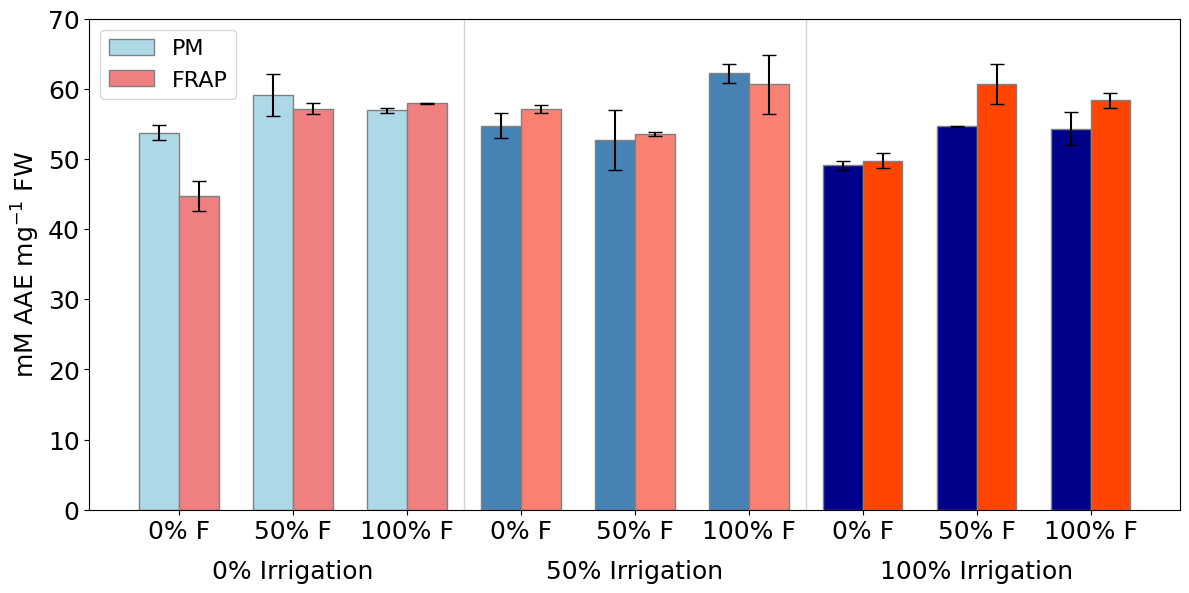

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Приблизителни данни от графиката
# Всяка тройка (PM, FRAP, PM_error, FRAP_error) отговаря на 0%, 50% и 100% Fertilization
# за дадено ниво на Irrigation (0%, 50%, 100%).

# 0% Irrigation
data_0_irrigation_pm = [53, 58, 57]
data_0_irrigation_frap = [47, 57, 58]
errors_0_irrigation_pm = [2, 2, 1]  # Приблизителни грешки
errors_0_irrigation_frap = [2, 1, 1] # Приблизителни грешки

# 50% Irrigation
data_50_irrigation_pm = [55, 54, 62]
data_50_irrigation_frap = [57, 54, 60]
errors_50_irrigation_pm = [1, 2, 1]
errors_50_irrigation_frap = [1, 2, 1]

# 100% Irrigation
data_100_irrigation_pm = [49, 55, 55]
data_100_irrigation_frap = [50, 60, 58]
errors_100_irrigation_pm = [1, 1, 1]
errors_100_irrigation_frap = [1, 1, 1]

# Обединяване на данните
pm_data = data_0_irrigation_pm + data_50_irrigation_pm + data_100_irrigation_pm
frap_data = data_0_irrigation_frap + data_50_irrigation_frap + data_100_irrigation_frap
pm_errors = errors_0_irrigation_pm + errors_50_irrigation_pm + errors_100_irrigation_pm
frap_errors = errors_0_irrigation_frap + errors_50_irrigation_frap + errors_100_irrigation_frap

# Изчисляване на средноаритметично за всяка група
pm_data = df.groupby('groups')['PM'].mean()
frap_data = df.groupby('groups')['FRAP'].mean()

# Изчисляване на стандартно отклонение за всяка група (извадка)
pm_errors = df.groupby('groups')['PM'].std(ddof=1)
frap_errors = df.groupby('groups')['FRAP'].std(ddof=1)

# Брой групи и ширина на колоните
n_groups = len(pm_data)
bar_width = 0.35

# Позиции на колоните
index = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(12, 6)) # Увеличаване на размера за по-добра четимост

# Създаване на колонна графика за PM
bar1 = ax.bar(index - bar_width/2, pm_data, bar_width, yerr=pm_errors, capsize=5,
              label='PM', color=['lightblue']*3 + ['steelblue']*3 + ['darkblue']*3,
              edgecolor='grey')

# Създаване на колонна графика за FRAP
bar2 = ax.bar(index + bar_width/2, frap_data, bar_width, yerr=frap_errors, capsize=5,
              label='FRAP', color=['lightcoral']*3 + ['salmon']*3 + ['orangered']*3,
              edgecolor='grey')

# Добавяне на етикети и заглавие
ax.set_ylabel('mM AAE mg$^{-1}$ FW', size=18) # В оригиналната графика няма етикет на Y оста
ax.set_ylim(0, 70) # Задаване на лимити на Y оста
ax.set_yticks(np.arange(0, 71, 10)) # Деления на Y оста
ax.set_yticklabels(np.arange(0, 71, 10), size=18, rotation=0)

# Етикети за X оста
fertilization_labels = ['0% F', '50% F', '100% F'] * 3
ax.set_xticks(index)
ax.set_xticklabels(fertilization_labels, size=18, rotation=0, ha='center')

# Добавяне на вертикални линии, които да разделят групите по Irrigation
for i in range(0, 2):
    ax.axvline(x=2.5 + i*3, color='lightgray', linestyle='-', linewidth=1)

# Добавяне на текстови етикети за Irrigation
ax.text(1, -.125, '0% Irrigation', size=18, ha='center', va='center', transform=ax.get_xaxis_transform())
ax.text(4, -.125, '50% Irrigation', size=18, ha='center', va='center', transform=ax.get_xaxis_transform())
ax.text(7, -.125, '100% Irrigation', size=18, ha='center', va='center', transform=ax.get_xaxis_transform())


ax.legend(prop={'size': 16})
plt.tight_layout() # Оптимизира разположението на елементите
plt.show()

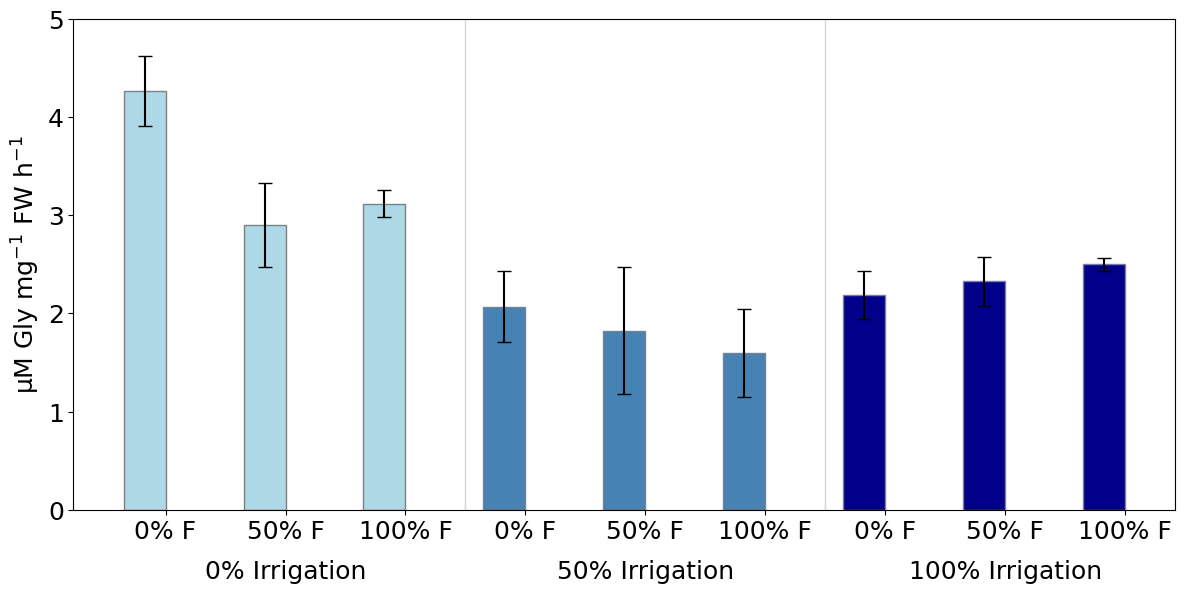

In [ ]:
# Изчисляване на средноаритметично за всяка група
data = df.groupby('groups')['GOX'].mean()

# Изчисляване на стандартно отклонение за всяка група (извадка)
errors = df.groupby('groups')['GOX'].std(ddof=1)

# Брой групи и ширина на колоните
n_groups = len(data)
bar_width = 0.35

# Позиции на колоните
index = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(12, 6)) # Увеличаване на размера за по-добра четимост

# Създаване на колонна графика за PM
bar1 = ax.bar(index - bar_width/2, data, bar_width, yerr=errors, capsize=5,
              label='PM', color=['lightblue']*3 + ['steelblue']*3 + ['darkblue']*3,
              edgecolor='grey')

# Добавяне на етикети и заглавие
ax.set_ylabel('\u03BCM Gly mg$^{-1}$ FW h$^{-1}$', size=18) # В оригиналната графика няма етикет на Y оста
ax.set_ylim(0, 5) # Задаване на лимити на Y оста
yticks = np.arange(0, 6, 1)
ax.set_yticks(yticks) # Деления на Y оста
ax.set_yticklabels(yticks, size=18, rotation=0)

# Етикети за X оста
fertilization_labels = ['0% F', '50% F', '100% F'] * 3
ax.set_xticks(index)
ax.set_xticklabels(fertilization_labels, size=18, rotation=0, ha='center')

# Добавяне на вертикални линии, които да разделят групите по Irrigation
for i in range(0, 2):
    ax.axvline(x=2.5 + i*3, color='lightgray', linestyle='-', linewidth=1)

# Добавяне на текстови етикети за Irrigation
ax.text(1, -.125, '0% Irrigation', size=18, ha='center', va='center', transform=ax.get_xaxis_transform())
ax.text(4, -.125, '50% Irrigation', size=18, ha='center', va='center', transform=ax.get_xaxis_transform())
ax.text(7, -.125, '100% Irrigation', size=18, ha='center', va='center', transform=ax.get_xaxis_transform())

plt.tight_layout() # Оптимизира разположението на елементите
plt.show()

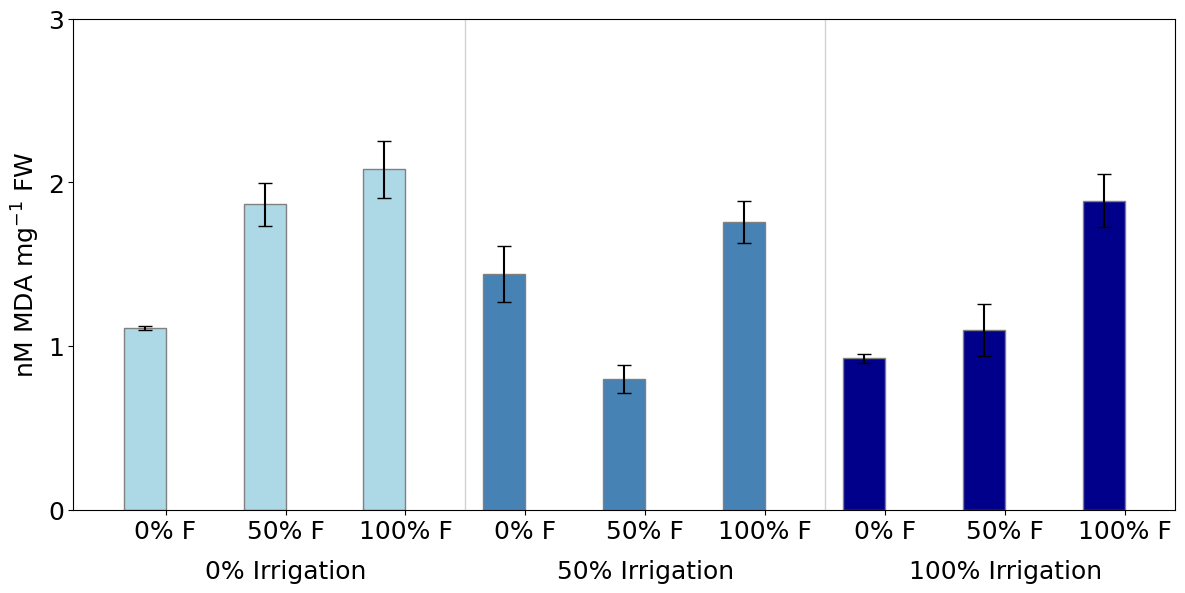

In [ ]:
# Изчисляване на средноаритметично за всяка група
data = df.groupby('groups')['MDA'].mean()

# Изчисляване на стандартно отклонение за всяка група (извадка)
errors = df.groupby('groups')['MDA'].std(ddof=1)

# Брой групи и ширина на колоните
n_groups = len(data)
bar_width = 0.35

# Позиции на колоните
index = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(12, 6)) # Увеличаване на размера за по-добра четимост

# Създаване на колонна графика за PM
bar1 = ax.bar(index - bar_width/2, data, bar_width, yerr=errors, capsize=5,
              label='PM', color=['lightblue']*3 + ['steelblue']*3 + ['darkblue']*3,
              edgecolor='grey')

# Добавяне на етикети и заглавие
ax.set_ylabel('nM MDA mg$^{-1}$ FW', size=18) # В оригиналната графика няма етикет на Y оста
ax.set_ylim(0, 3) # Задаване на лимити на Y оста
yticks = np.arange(0, 4, 1)
ax.set_yticks(yticks) # Деления на Y оста
ax.set_yticklabels(yticks, size=18, rotation=0)

# Етикети за X оста
fertilization_labels = ['0% F', '50% F', '100% F'] * 3
ax.set_xticks(index)
ax.set_xticklabels(fertilization_labels, size=18, rotation=0, ha='center')

# Добавяне на вертикални линии, които да разделят групите по Irrigation
for i in range(0, 2):
    ax.axvline(x=2.5 + i*3, color='lightgray', linestyle='-', linewidth=1)

# Добавяне на текстови етикети за Irrigation
kwargs = {'size': 18, 'ha': 'center', 'va': 'center', 'transform': ax.get_xaxis_transform()}
ax.text(1, -.125, '0% Irrigation', **kwargs)
ax.text(4, -.125, '50% Irrigation', **kwargs)
ax.text(7, -.125, '100% Irrigation', **kwargs)

plt.tight_layout() # Оптимизира разположението на елементите
plt.show()

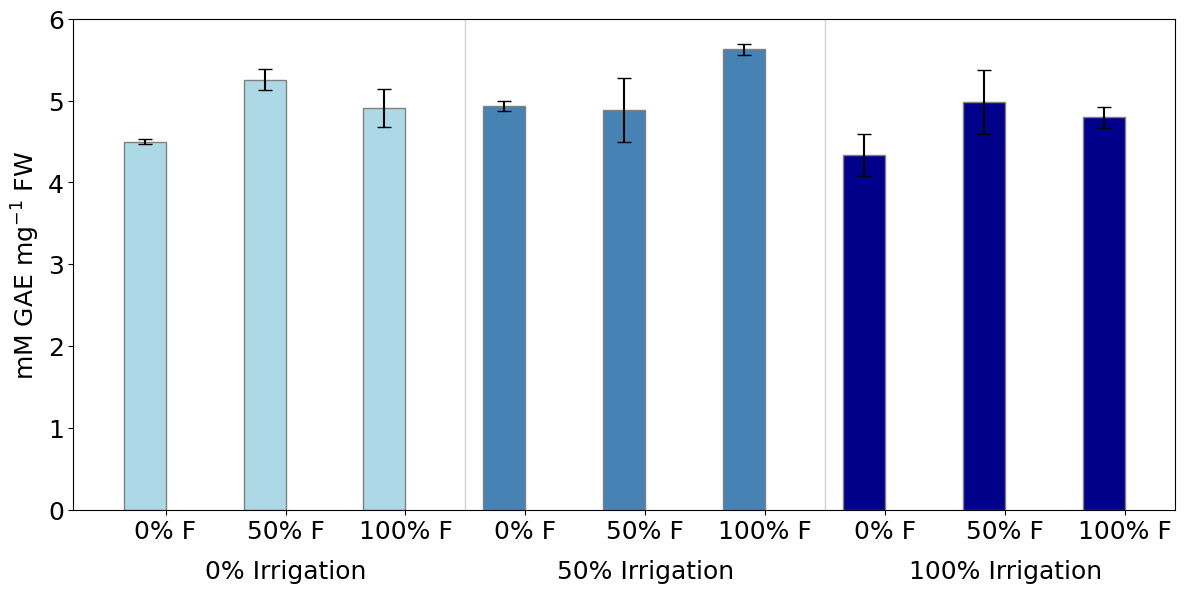

In [ ]:
# Изчисляване на средноаритметично за всяка група
data = df.groupby('groups')['TPC'].mean()

# Изчисляване на стандартно отклонение за всяка група (извадка)
errors = df.groupby('groups')['TPC'].std(ddof=1)

# Брой групи и ширина на колоните
n_groups = len(data)
bar_width = 0.35

# Позиции на колоните
index = np.arange(n_groups)

fig, ax = plt.subplots(figsize=(12, 6)) # Увеличаване на размера за по-добра четимост

# Създаване на колонна графика за PM
bar1 = ax.bar(index - bar_width/2, data, bar_width, yerr=errors, capsize=5,
              label='PM', color=['lightblue']*3 + ['steelblue']*3 + ['darkblue']*3,
              edgecolor='grey')

# Добавяне на етикети и заглавие
ax.set_ylabel('mM GAE mg$^{-1}$ FW', size=18) # В оригиналната графика няма етикет на Y оста
ax.set_ylim(0, 6) # Задаване на лимити на Y оста
yticks = np.arange(0, 7, 1)
ax.set_yticks(yticks) # Деления на Y оста
ax.set_yticklabels(yticks, size=18, rotation=0)

# Етикети за X оста
fertilization_labels = ['0% F', '50% F', '100% F'] * 3
ax.set_xticks(index)
ax.set_xticklabels(fertilization_labels, size=18, rotation=0, ha='center')

# Добавяне на вертикални линии, които да разделят групите по Irrigation
for i in range(0, 2):
    ax.axvline(x=2.5 + i*3, color='lightgray', linestyle='-', linewidth=1)

# Добавяне на текстови етикети за Irrigation
kwargs = {'size': 18, 'ha': 'center', 'va': 'center', 'transform': ax.get_xaxis_transform()}
ax.text(1, -.125, '0% Irrigation', **kwargs)
ax.text(4, -.125, '50% Irrigation', **kwargs)
ax.text(7, -.125, '100% Irrigation', **kwargs)

plt.tight_layout() # Оптимизира разположението на елементите
plt.show()